In [11]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from functools import reduce
from operator import add
import matplotlib.pyplot as plt
import seaborn

import src.pipe as pipe

plt.style.use('fivethirtyeight')
%matplotlib inline

In [12]:
import src.models as models
%load_ext autoreload
%autoreload 1
%aimport src.models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [14]:
import xgboost as xgb

### Without labels, without popularity

In [14]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
bbd.drop_popularities()

In [15]:
df = bbd.df.copy().drop(columns='label')

In [16]:
rand = 7
_y = df.pop('on_billboard').values
_X = df.values
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.1)

In [17]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1)

cv = cross_validate(rf, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
present_cv(cv)

,metric,mean,std
0,fit_time,2.197117,0.620057
1,score_time,0.379995,0.057058
2,test_accuracy,0.687819,0.004054
3,test_recall,0.668553,0.005415
4,test_precision,0.716195,0.004239


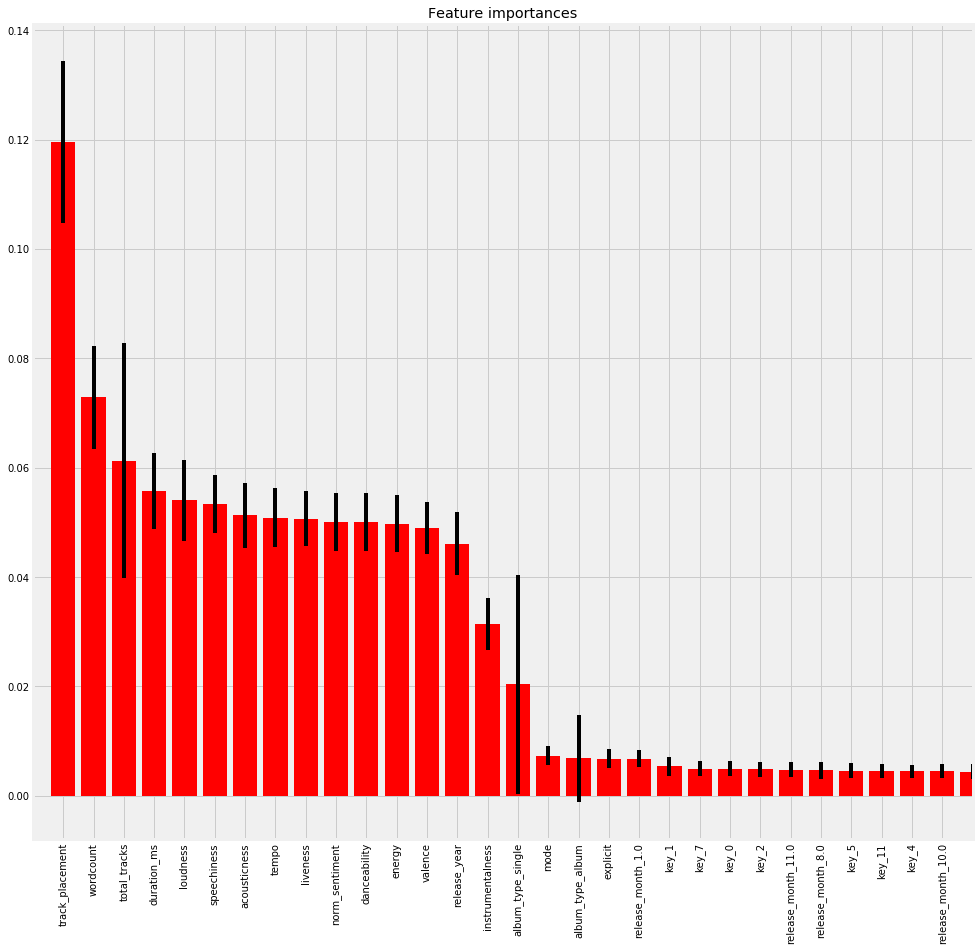

In [18]:
rf.fit(X_train, y_train)
plot_feature_importances(X_train, rf, 30, df.columns)

### Without labels, with popularity

In [19]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()

In [20]:
df = bbd.df.copy().drop(columns='label')

In [21]:
rand = 7
_y = df.pop('on_billboard').values
_X = df.values
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.1)

In [22]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1)

cv = cross_validate(rf, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
present_cv(cv)

,metric,mean,std
0,fit_time,2.032340,0.632466
1,score_time,0.314641,0.006719
2,test_accuracy,0.856379,0.007880
3,test_recall,0.870748,0.010341
4,test_precision,0.857988,0.006934


### With dummyized labels, with popularity

In [23]:
bbd2 = pipe.BillboardData() 
bbd2.transform_for_models()
bbd2.dummyize_record_label()

In [24]:
df = bbd2.df.copy()

In [25]:
rand = 7
_y = df.pop('on_billboard').values
_X = df.values
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.1)

In [26]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1)

cv = cross_validate(rf, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
present_cv(cv)

,metric,mean,std
0,fit_time,2.692043,0.867386
1,score_time,0.319513,0.008042
2,test_accuracy,0.852263,0.006502
3,test_recall,0.864933,0.007143
4,test_precision,0.855492,0.008506


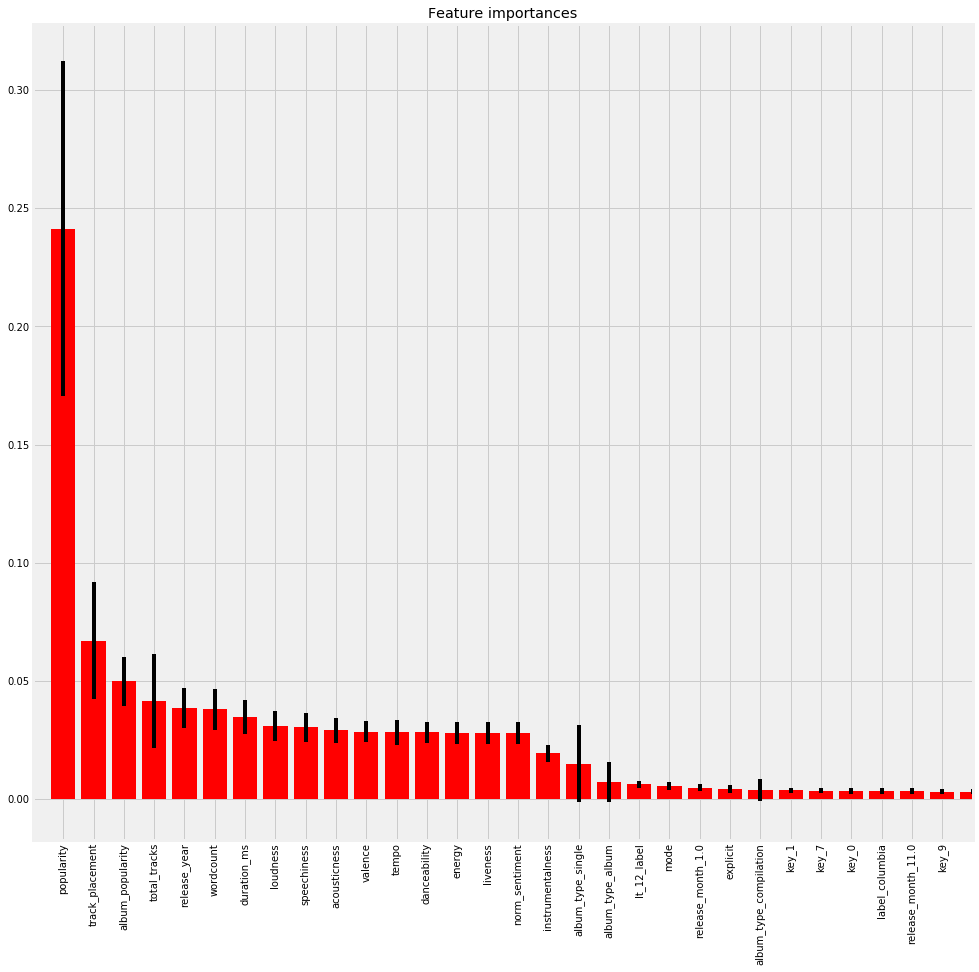

In [27]:
rf.fit(X_train, y_train)
plot_feature_importances(X_train, rf, 30, df.columns)

### With HITCOUNT, with popularity

In [28]:
bbd2 = pipe.BillboardData() 

bbd2.transform_for_models()
bbd2.transform_label_to_labelhitcount()

df = bbd2.df.copy()

In [29]:
rand = 7
_y = df.pop('on_billboard').values
_X = df.values
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.1)

In [30]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1)

cv = cross_validate(rf, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
present_cv(cv)

,metric,mean,std
0,fit_time,2.020556,0.627139
1,score_time,0.310018,0.001328
2,test_accuracy,0.861646,0.008777
3,test_recall,0.875689,0.012683
4,test_precision,0.862304,0.008103


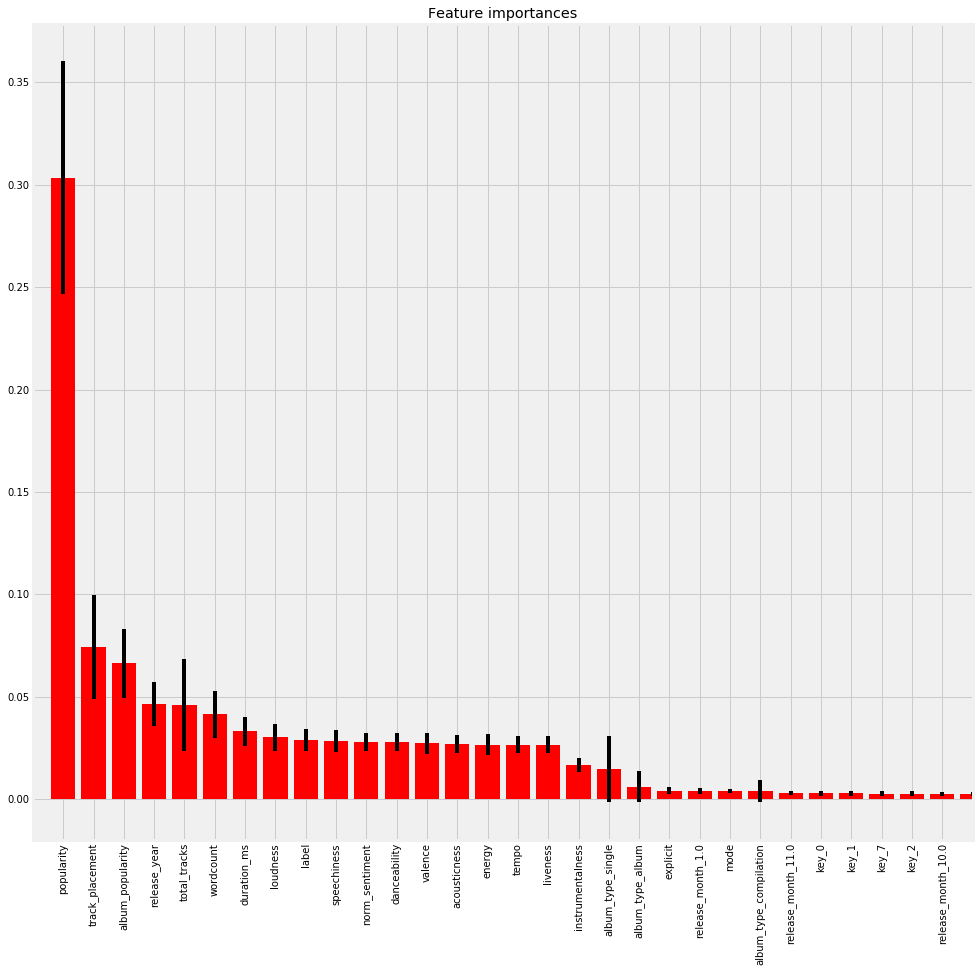

In [31]:
rf.fit(X_train, y_train)
plot_feature_importances(X_train, rf, 30, df.columns)

### XGB With HITCOUNT, with popularity

In [242]:
bbd2 = pipe.BillboardData() 

bbd2.transform_for_models()
bbd2.transform_label_to_labelhitcount()

df = bbd2.df.copy()

In [243]:
rand = 7
_y = df.pop('on_billboard').values
_X = df.values
X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=0.1)

In [244]:
model = xgb.XGBClassifier(n_jobs=-1)

In [246]:
cv = cross_validate(model, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
models.present_cv(cv)

,metric,mean,std
0,fit_time,3.472166,0.220169
1,score_time,0.023015,0.000306
2,test_accuracy,0.875309,0.004749
3,test_recall,0.886785,0.004394
4,test_precision,0.875944,0.007479


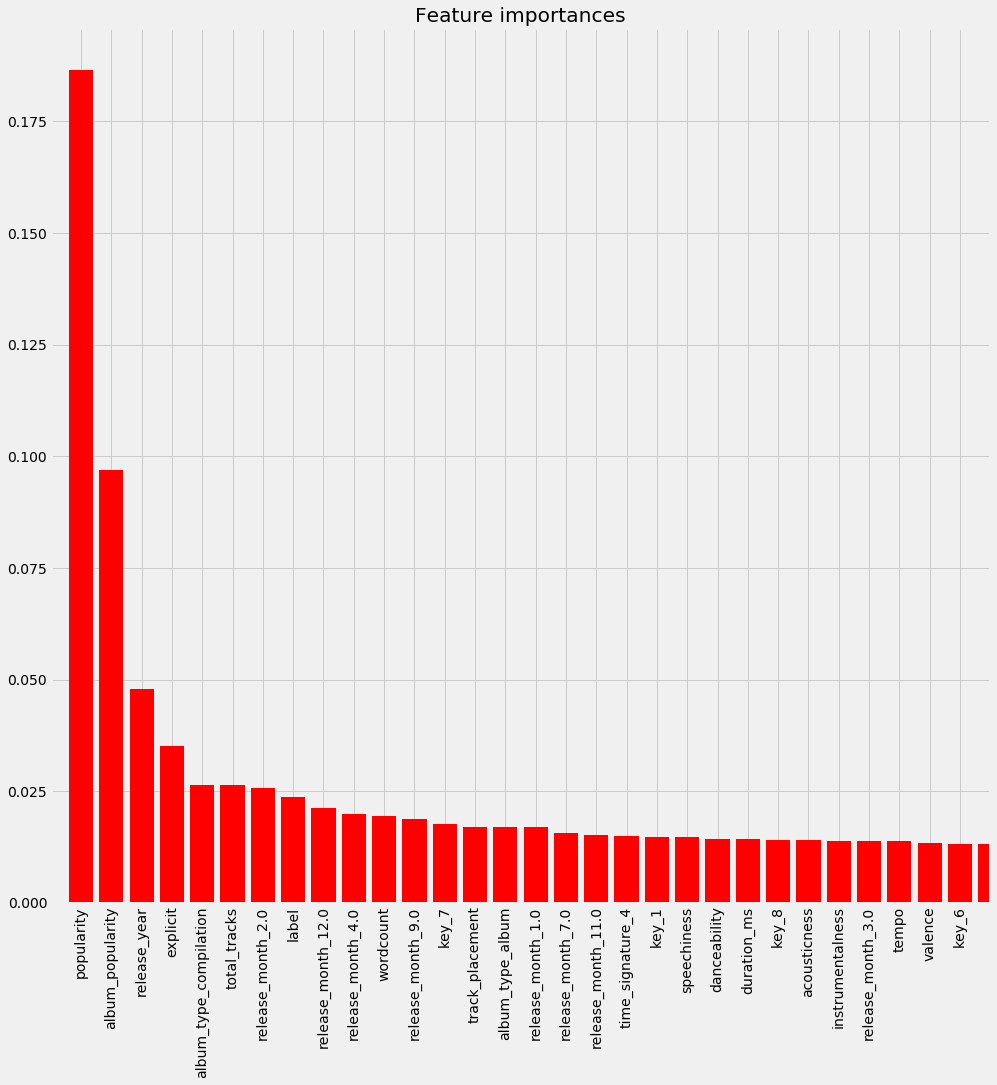

In [247]:
model.fit(X_train, y_train)
models.plot_feature_importances(X_train, model, 30, df.columns)

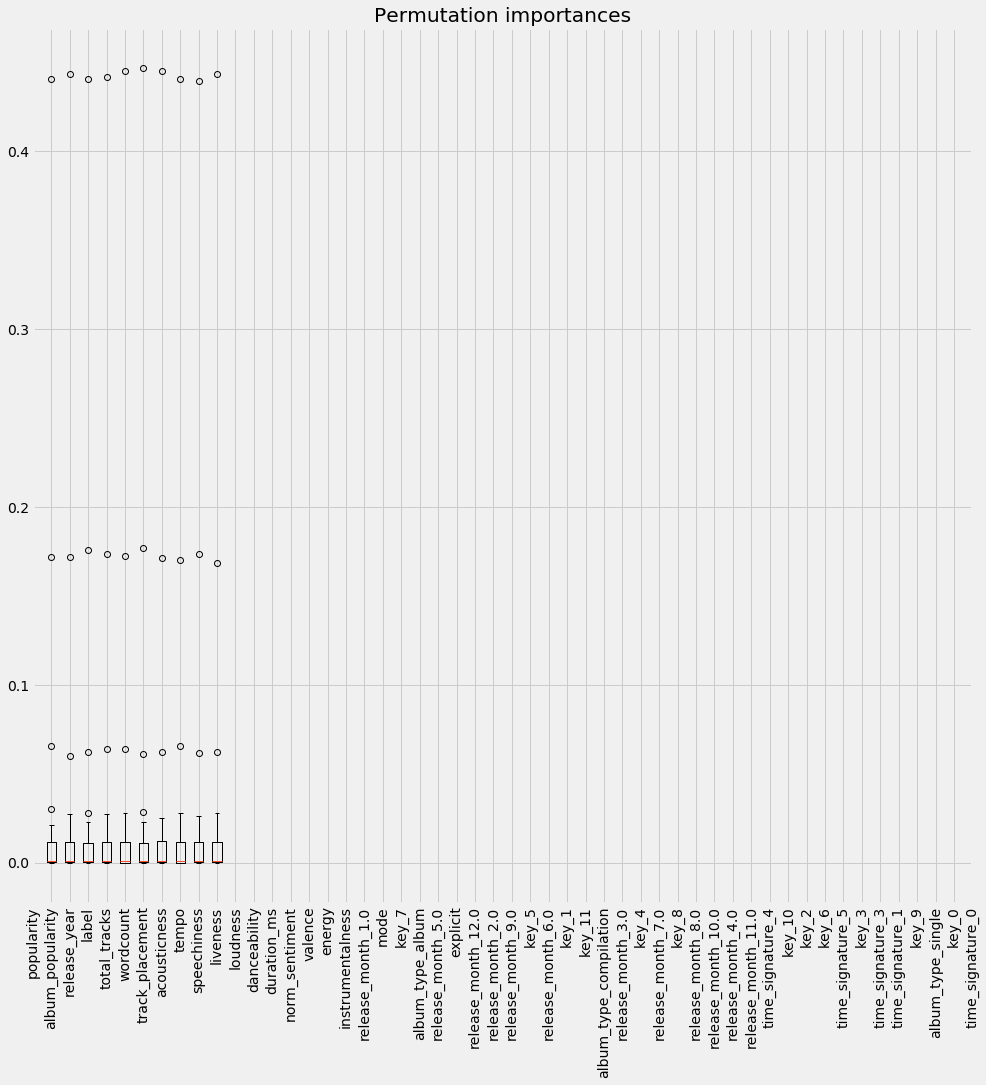

In [250]:
models.plot_perm_importances(model, X_train, y_train, np.inf, df.columns)

In [36]:
df.columns

Index(['total_tracks', 'duration_ms', 'explicit', 'popularity', 'danceability',
       'energy', 'acousticness', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'wordcount',
       'label', 'album_popularity', 'norm_sentiment', 'release_year',
       'track_placement', 'album_type_album', 'album_type_compilation',
       'album_type_single', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'release_month_1.0',
       'release_month_2.0', 'release_month_3.0', 'release_month_4.0',
       'release_month_5.0', 'release_month_6.0', 'release_month_7.0',
       'release_month_8.0', 'release_month_9.0', 'release_month_10.0',
       'release_month_11.0', 'release_month_12.0'],
      dtype='object')

In [39]:
df.shape

(13501, 52)

In [231]:
X, y = models.get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [232]:
# myx = models.MyModel(xgb.XGBClassifier, {'n_jobs':-1})
myx = models.MyModel(RandomForestClassifier, {"n_estimators":100, "oob_score":True, "n_jobs":-1})

In [233]:
myx.fit(X_train, y_train)

In [234]:
r = myx.predict(X_test.copy())

In [235]:
np.mean(r==y_test.values.astype(np.uint8))

0.8682457438934122

In [236]:
Xt = X_test.copy()
np.mean(myx.predict_proba(X_test.copy())[:,1]>0.5)

0.5277572168763879

In [237]:
mask = ~(myx.fitX.columns==myx.predX.columns)

In [238]:
myx.predX.columns[mask]

Index([], dtype='object')

### XGB With HITCOUNT, with popularity

In [239]:

X, y = models.get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [240]:
model =models.MyModel(RandomForestClassifier, {"n_estimators":100, "oob_score":True, "n_jobs":-1})

In [241]:
cv = cross_validate(model, X_train, y_train, scoring=['accuracy', 'recall', 'precision'],
              n_jobs=-1, cv=5, return_train_score=False)
present_cv(cv)

TypeError: Cannot clone object '<src.models.MyModel object at 0x7f7e322809b0>' (type <class 'src.models.MyModel'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

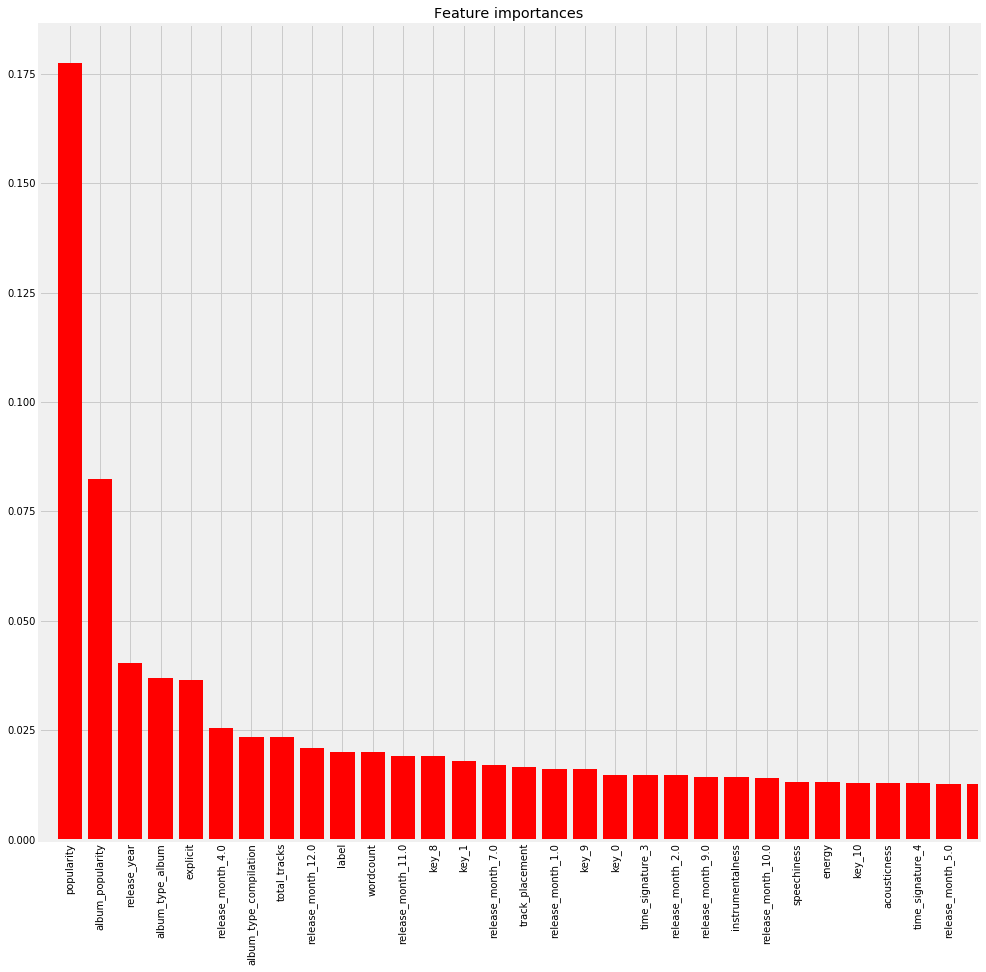

In [12]:
model.fit(X_train, y_train)
plot_feature_importances(X_train, model, 30, df.columns)

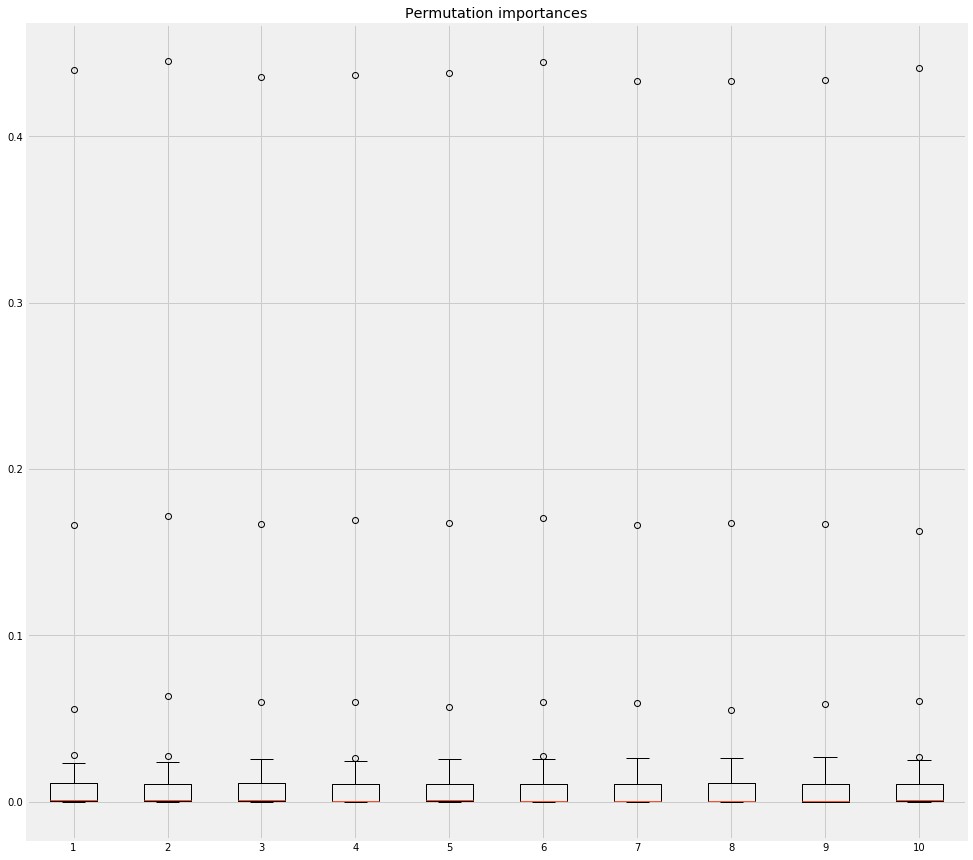

In [35]:
plot_perm_importances(model, X_train, y_train, np.inf, df.columns)